In [1]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval
import chess

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator, FourPeaks, FlipFlopGenerator, KnapsackGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner
from mlrose_hiive import DiscreteOpt
from mlrose_hiive import SARunner, GARunner, NNGSRunner, RHCRunner
from mlrose_hiive.fitness import MaxKColor as MaxKColorFitness
from A2_helpers.Four_peaks_helpers import Runner_overSeeds
import pandas as pd

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

# fitness funcions list
#https://mlrose.readthedocs.io/en/stable/source/fitness.html#fitness

# about the mlrose setup
#https://mlrose.readthedocs.io/en/stable/source/tutorial1.html

# algos
# https://mlrose.readthedocs.io/en/stable/source/algorithms.html#algs

C:\Users\WarrenKushner\AppData\Local\Temp\ipykernel_42552\54465324.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML # for some notebook formatting.


In [2]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval
import chess

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator, FourPeaks, FlipFlopGenerator, KnapsackGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner
from mlrose_hiive import DiscreteOpt
from mlrose_hiive import SARunner, GARunner, NNGSRunner, RHCRunner
from A2_helpers.Four_peaks_helpers import Runner_overSeeds
import pandas as pd
import numpy as np

# switch off the chatter
logging.basicConfig(level=logging.WARNING)


In [3]:
from A2_helpers import MaxKColor_helpers
from A2_helpers.MaxKColor_helpers import Runner_overSeeds


problems = MaxKColor_helpers.genaerate_problems_over_size(length = [ 5,  15,  25, 35,   ])

problem of size 5 for MaxKColorGenedddrator. maximum_expected: 10.0 for size 5
problem of size 15 for MaxKColorGenedddrator. maximum_expected: 105.0 for size 15
problem of size 25 for MaxKColorGenedddrator. maximum_expected: 300.0 for size 25
problem of size 35 for MaxKColorGenedddrator. maximum_expected: 595.0 for size 35


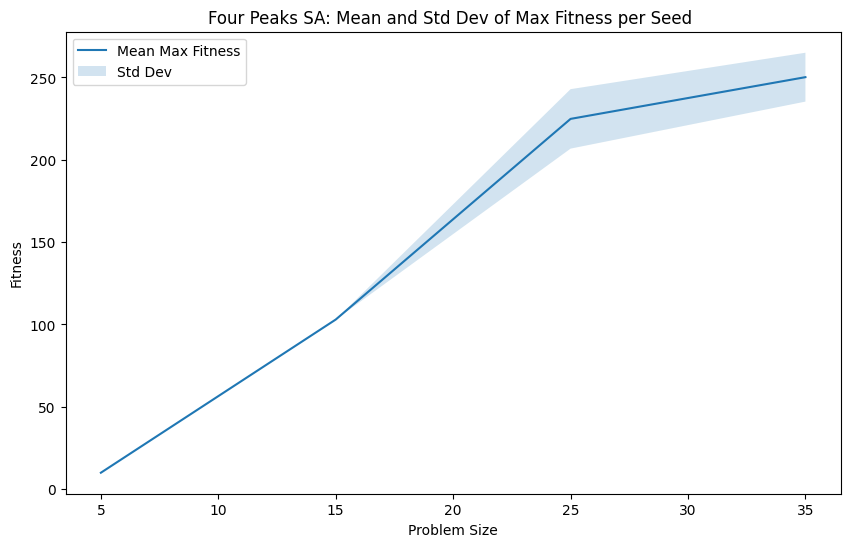

[     Iteration  Fitness  FEvals      Time            State schedule_type  \
 0            0      1.0       0  0.000125  [3, 4, 0, 1, 3]   exponential   
 1            1      1.0       2  0.001563  [0, 4, 0, 1, 3]   exponential   
 2            2      1.0       4  0.002642  [0, 4, 0, 1, 2]   exponential   
 3            4      2.0       8  0.003840  [0, 4, 0, 1, 4]   exponential   
 4            8      3.0      15  0.004881  [3, 1, 1, 1, 4]   exponential   
 ..         ...      ...     ...       ...              ...           ...   
 139         64      0.0     111  0.037011  [0, 2, 4, 1, 3]     geometric   
 140        128      0.0     111  0.037011  [0, 2, 4, 1, 3]     geometric   
 141        256      0.0     111  0.037011  [0, 2, 4, 1, 3]     geometric   
 142        512      0.0     111  0.037011  [0, 2, 4, 1, 3]     geometric   
 143       1024      0.0     111  0.037011  [0, 2, 4, 1, 3]     geometric   
 
      schedule_init_temp  schedule_exp_const  schedule_min_temp  \
 0     

<Figure size 640x480 with 0 Axes>

In [9]:


"""
For all temperatures and decay schedules, run the SA algorithm for the 4-peaks problem for problem sizes of 10, 20, 40, 80, and 160
We find the mean maximum per seed (i.e per run across all other parameters and iteratsions to cover the optimum this algorithm can do on this problem)
"""
#     sa = SARunner(problem=problem,
#                 experiment_name='4peaks_sa',
#                 output_directory=None, # note: specify an output directory to have results saved to disk
#                 seed=s,
#                 iteration_list=2 ** np.arange(11),
#                 max_attempts=10,
#                 temperature_list=[0.1, 0.5, 0.75, 1.0, 2.0, 5.0],
# 
# decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay],)
kwargs = {"max_attempts":200, "iteration_list":2 ** np.arange(11), "temperature_list": [0.1, 0.5, 0.75, 1.0, 2.0, 5.0], "decay_list":[mlrose_hiive.ExpDecay, mlrose_hiive.GeomDecay],   "experiment_name": "SA_runner"} 

sizes = []
mean_fitness_per_size = []
std_fitness_per_size = []
df_run_stats_total_all_problem_sizes_sa = []
df_run_curves_total_all_problem_sizes_sa = []
for size,p in problems:
    
     df_run_stats_total, df_run_curves_total = Runner_overSeeds( 
                     problem = p, 
                     seeds = [1, 2, 3, 4, 5,10], 
                     **kwargs
                     )
     df_run_stats_total["problem_size"] = size
     df_run_stats_total_all_problem_sizes_sa.append(df_run_stats_total)
     df_run_curves_total_all_problem_sizes_sa.append(df_run_curves_total)
          # Find the mean max fitness per seed
     max_fitness_per_seed = df_run_curves_total.groupby('seed')['Fitness'].max()
     mean_fitness = max_fitness_per_seed.mean()
     std_fitness = max_fitness_per_seed.std()
     
     mean_fitness_per_size.append(mean_fitness)
     std_fitness_per_size.append(std_fitness)
     sizes.append(size)
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sizes, mean_fitness_per_size, label='Mean Max Fitness')
ax.fill_between(sizes, 
                np.array(mean_fitness_per_size) - np.array(std_fitness_per_size), 
                np.array(mean_fitness_per_size) + np.array(std_fitness_per_size), 
                alpha=0.2, label='Std Dev')

ax.set_xlabel('Problem Size')
ax.set_ylabel('Fitness')
ax.set_title('Four Peaks SA: Mean and Std Dev of Max Fitness per Seed ')
ax.legend()
plt.show()
plt.savefig("Four_peaks_SA_mean_max_fitness_per_seed.png")

df_run_stats_total_all_problem_sizes_sa



In [10]:
# ## SA convert to dataframes and save to csv
if len(df_run_stats_total_all_problem_sizes_sa) and len(df_run_curves_total_all_problem_sizes_sa):
    df_run_stats_total_all_problem_sizes_sa_all = pd.concat(df_run_stats_total_all_problem_sizes_sa)
    df_run_curves_total_all_problem_sizes_sa_all = pd.concat(df_run_curves_total_all_problem_sizes_sa)

    df_run_stats_total_all_problem_sizes_sa_all.to_csv("RunData/MaxKColor/MaxKColor_df_run_stats_total_all_problem_sizes_sa.csv")
    df_run_curves_total_all_problem_sizes_sa_all.to_csv("RunData/MaxKColor/MaxKColor_df_run_curves_total_all_problem_sizes_sa.csv")

    df_run_stats_total_all_problem_sizes_sa

In [7]:
# import matplotlib.pyplot as plt

# # Assuming sa_stats_all is your DataFrame with columns ["problem_size", "Iteration", "Fitness", "schedule_init_temp", "schedule_type"]

# # Plotting the Fitness vs Function Evaluations
# plt.figure(figsize=(12, 6))

# # Iterate through each unique problem size
# for size in ga_stats_all["problem_size"].unique():
#     # Filter the best hyperparameters for the given problem size
#     best_hyper_params = min_iteration_for_max_fitness[min_iteration_for_max_fitness["problem_size"] == size]
    
#     # If there are no best hyperparameters for the current problem size, skip this iteration
#     # if best_hyper_params.empty:
#     #     continue

#     # Further filter the main DataFrame for these best hyperparameters
#     df = ga_stats_all[(ga_stats_all["problem_size"] == size) & 
#                       (ga_stats_all["Population Size"] == best_hyper_params["Population Size"].iloc[0]) & 
#                       (ga_stats_all["Mutation Rate"] == best_hyper_params["Mutation Rate"].iloc[0])]
    

#     # Calculate the mean and standard deviation of Fitness for each iteration
#     df_grouped = df.groupby("Iteration")["Fitness"].agg(["mean", "std"]).reset_index()
    
#     # If the DataFrame is empty after filtering, skip this iteration
#     # if df_grouped.empty:
#     #     continue
    
#     # Plot the mean fitness with error bands representing the standard deviation
#     plt.plot(df_grouped["Iteration"], df_grouped["mean"], label=f"Problem Size: {size}")
#     plt.fill_between(df_grouped["Iteration"], df_grouped["mean"] - df_grouped["std"], df_grouped["mean"] + df_grouped["std"], alpha=0.1)

# # Set the labels and title of the plot
# plt.xlabel('Iterations')
# plt.ylabel('Fitness')
# plt.title('GA (Four Peaks): Fitness vs  Iterations')
# plt.legend(title='Problem Sizes')
# plt.show()


problems

In [8]:
## SA convert to dataframes and save to csv
if df_run_stats_total_all_problem_sizes_sa and df_run_curves_total_all_problem_sizes_sa:
    df_run_stats_total_all_problem_sizes_sa = pd.concat(df_run_stats_total_all_problem_sizes_sa)
    df_run_curves_total_all_problem_sizes_sa = pd.concat(df_run_curves_total_all_problem_sizes_sa)

    df_run_stats_total_all_problem_sizes_sa.to_csv("RunData/MaxKColor/MaxKColor_df_run_stats_total_all_problem_sizes_sa.csv")
    df_run_curves_total_all_problem_sizes_sa.to_csv("RunData/MaxKColor/MaxKColor_df_run_curves_total_all_problem_sizes_sa.csv")

## GA Runner

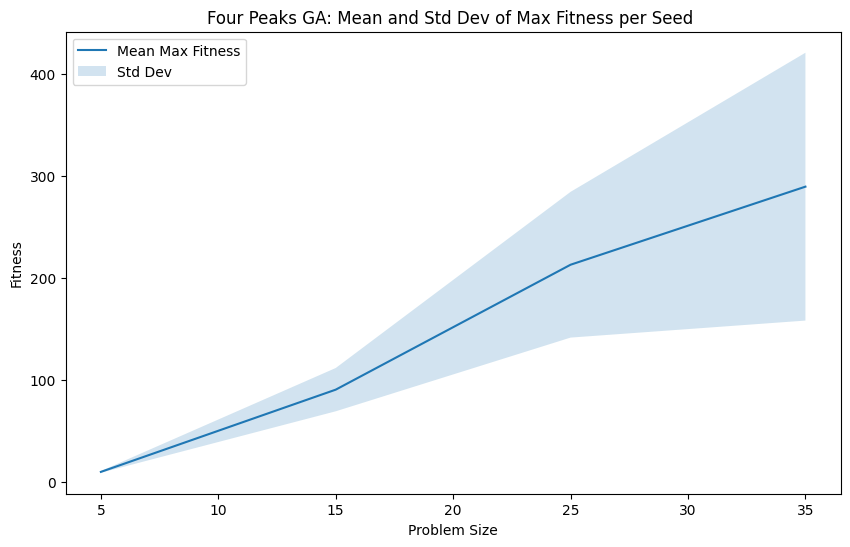

<Figure size 640x480 with 0 Axes>

In [5]:
    # create a runner class and solve the problem
kwargs = {"max_attempts":200, "iteration_list":2 ** np.arange(11), "population_sizes": [5,10,30,50], "mutation_rates":[0.05,0.1, 0.2, 0.5,0.75], "experiment_name": "GA_runner"} 

sizes = []
mean_fitness_per_size = []
std_fitness_per_size = []
df_run_stats_total_all_problem_sizes_ga = []
df_run_curves_total_all_problem_sizes_ga = []
for size,p in problems:
    
     df_run_stats_total, df_run_curves_total = Runner_overSeeds( 
                     problem = p, 
                     seeds = [1, 2, 3, 4, 5,10], 
                     runner_algorthm= mlrose_hiive.GARunner,
                     **kwargs
                     )
     df_run_stats_total["problem_size"] = size
     df_run_stats_total_all_problem_sizes_ga.append(df_run_stats_total)
     df_run_curves_total_all_problem_sizes_ga.append(df_run_curves_total)
          # Find the mean max fitness per seed
     max_fitness_per_seed = df_run_curves_total.groupby('seed')['Fitness'].max()
     # find the avg max fitness per seed per ( mutation rate, population size)
     max_fitness_per_seed_per_size = df_run_curves_total.groupby(['Mutation Rate', 'Population Size', 'seed'])['Fitness'].max()
     
     mean_fitness = max_fitness_per_seed_per_size.mean()
     std_fitness = max_fitness_per_seed_per_size.std()
     
     mean_fitness_per_size.append(mean_fitness)
     std_fitness_per_size.append(std_fitness)
     sizes.append(size)
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sizes, mean_fitness_per_size, label='Mean Max Fitness')
ax.fill_between(sizes, 
                np.array(mean_fitness_per_size) - np.array(std_fitness_per_size), 
                np.array(mean_fitness_per_size) + np.array(std_fitness_per_size), 
                alpha=0.2, label='Std Dev')

ax.set_xlabel('Problem Size')
ax.set_ylabel('Fitness')
ax.set_title('Four Peaks GA: Mean and Std Dev of Max Fitness per Seed ')
ax.legend()
plt.show()
plt.savefig("Four_peaks_GA_mean_max_fitness_per_seed.png")


In [6]:
# convert the above to dataframes and save to csv
if df_run_stats_total_all_problem_sizes_ga and df_run_curves_total_all_problem_sizes_ga:
    df_run_stats_total_all_problem_sizes_ga = pd.concat(df_run_stats_total_all_problem_sizes_ga)
    df_run_curves_total_all_problem_sizes_ga = pd.concat(df_run_curves_total_all_problem_sizes_ga)

    df_run_stats_total_all_problem_sizes_ga.to_csv("RunData/MaxKColor/MaxKColor_df_run_stats_total_all_problem_sizes_ga.csv")
    df_run_curves_total_all_problem_sizes_ga.to_csv("RunData/MaxKColor/MaxKColor_df_run_curves_total_all_problem_sizes_ga.csv")

## RHC Runner

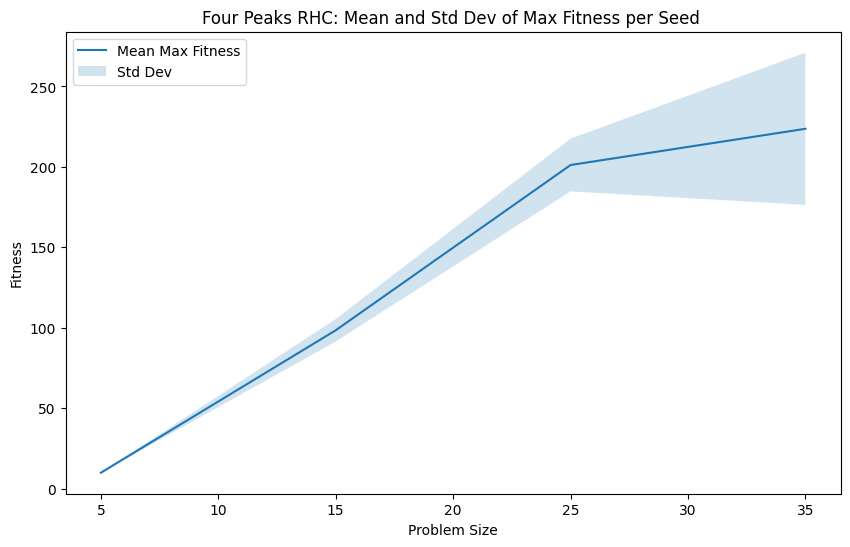

In [7]:
# import runnover over seeds
                 
                 
    # create a runner class and solve the problem
kwargs = { "max_attempts":200,"iteration_list":2 ** np.arange(11), "restart_list": [1],  "experiment_name": "RHC_runner"} 

sizes = []
mean_fitness_per_size = []
std_fitness_per_size = []
df_run_stats_total_all_problem_sizes_rhc = []
df_run_curves_total_all_problem_sizes_rhc = []
for size,p in problems:
    
     df_run_stats_total, df_run_curves_total = Runner_overSeeds( 
                     problem = p, 
                     seeds = [1, 2, 3, 4, 5,10], 
                     runner_algorthm= mlrose_hiive.RHCRunner,
                     **kwargs
                     )
     df_run_stats_total["problem_size"] = size
     df_run_stats_total_all_problem_sizes_rhc.append(df_run_stats_total)
     df_run_curves_total_all_problem_sizes_rhc.append(df_run_curves_total)
          # Find the mean max fitness per seed
     max_fitness_per_seed = df_run_curves_total.groupby('seed')['Fitness'].max()
     mean_fitness = max_fitness_per_seed.mean()
     std_fitness = max_fitness_per_seed.std()
     
     mean_fitness_per_size.append(mean_fitness)
     std_fitness_per_size.append(std_fitness)
     sizes.append(size)
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sizes, mean_fitness_per_size, label='Mean Max Fitness')
ax.fill_between(sizes, 
                np.array(mean_fitness_per_size) - np.array(std_fitness_per_size), 
                np.array(mean_fitness_per_size) + np.array(std_fitness_per_size), 
                alpha=0.2, label='Std Dev')

ax.set_xlabel('Problem Size')
ax.set_ylabel('Fitness')
ax.set_title('Four Peaks RHC: Mean and Std Dev of Max Fitness per Seed ')
ax.legend()
plt.show()


In [8]:
if df_run_stats_total_all_problem_sizes_rhc and df_run_curves_total_all_problem_sizes_rhc:
    df_run_stats_total_all_problem_sizes_rhc = pd.concat(df_run_stats_total_all_problem_sizes_rhc)
    df_run_curves_total_all_problem_sizes_rhc = pd.concat(df_run_curves_total_all_problem_sizes_rhc)

    df_run_stats_total_all_problem_sizes_rhc.to_csv("RunData/MaxKColor/MaxKColor_df_run_stats_total_all_problem_sizes_rhc.csv")
    df_run_curves_total_all_problem_sizes_rhc.to_csv("RunData/MaxKColor/MaxKColor_df_run_curves_total_all_problem_sizes_rhc.csv")

In [7]:
df_run_stats_total_all_problem_sizes_rhc

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart,seed,problem_size
0,0,1.0,0,0.000104,"[3, 4, 0, 1, 3]",1,1024,0,1,5
1,1,1.0,1,0.002257,"[3, 4, 0, 1, 3]",1,1024,0,1,5
2,2,2.0,3,0.003062,"[3, 0, 0, 1, 3]",1,1024,0,1,5
3,4,3.0,6,0.004127,"[3, 3, 0, 1, 3]",1,1024,0,1,5
4,8,4.0,11,0.004949,"[3, 3, 1, 1, 3]",1,1024,0,1,5
...,...,...,...,...,...,...,...,...,...,...
19,64,36.0,1151,0.479084,"[7, 14, 15, 4, 13, 22, 0, 4, 13, 7, 13, 7, 1, ...",1,1024,1,10,35
20,128,50.0,1222,0.530440,"[7, 7, 13, 13, 13, 4, 0, 4, 13, 7, 13, 7, 1, 4...",1,1024,1,10,35
21,256,80.0,1361,0.597400,"[7, 7, 13, 13, 13, 0, 0, 4, 13, 7, 13, 7, 1, 4...",1,1024,1,10,35
22,512,123.0,1628,0.737840,"[7, 7, 13, 13, 13, 0, 7, 0, 13, 13, 13, 7, 1, ...",1,1024,1,10,35
